# Preliminary Analysis
This notebook generates a series of graphs that show why some of our features are relevent to predicting rent.

In [105]:
# import necessary functions and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [106]:
# read in the data
full_df = pd.read_csv('../data/curated/Processed Data Final.csv')
full_df

,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,year,Average_household_size,Average_num_psns_per_bedroom,Median_age_persons,Tot_P_P,average_quarterly_count,...,gdp_cbd/inflation/beach,gdp_cbd/inflation/cbd,gpd/inflation/airbnb,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person
0,11.733250,8.640331,8.364811,6.249589,2016,1.335001,0.587787,3.583519,9.129239,7.184629,...,2.110624,13.957417,0.000000,101.439296,0.004329,0.035585,0.000976,0.000434,0.001950,0.000000
1,10.983561,8.322540,9.375177,6.892845,2016,1.308333,0.587787,3.761200,8.182559,6.993474,...,1.425852,13.207720,4.939409,127.949206,0.005298,0.016910,0.001397,0.001397,0.001118,0.000000
2,11.001156,8.255751,9.516059,6.626585,2016,1.308333,0.587787,3.688879,8.632662,7.128897,...,1.594500,13.225316,3.637149,125.672530,0.010460,0.037258,0.001781,0.001959,0.002847,0.000356
3,10.486549,7.682160,8.054364,5.964350,2016,1.335001,0.693147,3.555348,9.144094,7.186144,...,0.834964,12.710699,3.855013,116.194103,0.024176,0.050732,0.005754,0.005541,0.009466,0.000000
4,10.433872,7.682482,8.539600,6.585206,2016,1.360977,0.587787,3.828641,9.365548,6.790941,...,0.992818,12.658020,5.560234,142.477687,0.003334,0.018495,0.000257,0.000514,0.000941,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,10.812341,8.159432,9.480612,7.060648,2028,1.319086,0.587787,3.797734,7.170120,NaN,...,1.368090,13.042158,6.016466,NaN,0.003052,0.014567,0.000796,0.002439,0.002771,0.003982
6093,10.755069,7.927829,8.886603,6.591399,2028,1.435085,0.506818,3.678829,7.121898,NaN,...,1.107578,12.984885,2.975360,NaN,0.004762,0.009650,0.001627,0.001225,0.002629,0.000330
6094,10.004165,7.311018,8.276318,6.120737,2028,1.193922,0.565314,3.520461,7.893199,NaN,...,0.730340,12.233960,5.600833,NaN,0.006798,0.043987,0.002098,0.001152,0.006898,0.000668
6095,10.528393,7.918847,7.256086,5.047931,2028,1.335001,0.587787,3.673766,10.110046,NaN,...,1.406697,12.758205,5.126164,NaN,0.007860,0.012230,0.000893,0.001134,0.004640,0.000314


In [107]:
full_df.columns

Index(['distance_to_CBD', 'time_to_CBD', 'distance_to_station',
       'time_to_station', 'year', 'Average_household_size',
       'Average_num_psns_per_bedroom', 'Median_age_persons', 'Tot_P_P',
       'average_quarterly_count', 'SAL_CODE', 'median_score', 'average_price',
       'proximity_to_beach', 'airbnb_count', 'commercial density',
       'education density', 'food_establishments density',
       'healthcare density', 'industrial density', 'public_transport density',
       'recreation density', 'residential density', 'shopping density',
       'pop density', 'interest_rate', 'Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot_prsnl_inc_weekly/inflation', 'gdp_cbd/inflation/beach',
       'gdp_cbd/inflation/cbd', 'gpd/inflation/airbnb',
       'average_weekly_rent/inflation/household_size',
       'A Crimes against the person/per_person',
       'B Property and deception offences/per_person',
       'C Drug offences/per_person

In [108]:
# retrieve inflation data

data_raw = pd.read_csv("../data/curated/NO_DOMAIN_DATASET.csv")
df = data_raw
df = df.sort_values('year')

# Convert 'inflation' rates from percentages to decimals
df['inflation_decimal'] = df['inflation'] / 100

# Create a DataFrame containing all years from 2016 to the maximum year in your data
years = pd.DataFrame({'year': range(2016, df['year'].max() + 1)})

# Merge with the inflation data to ensure all years are included
inflation_data = pd.merge(years, df[['year', 'inflation_decimal']].drop_duplicates(), on='year', how='left')

# Forward-fill any missing inflation rates (if any years are missing)
inflation_data['inflation_decimal'] = inflation_data['inflation_decimal'].fillna(method='ffill')

# Calculate the cumulative inflation factor from 2016 to each year
inflation_data['cumulative_inflation_factor'] = (1 + inflation_data['inflation_decimal']).cumprod()

# Create a dictionary to map years to cumulative inflation factors
cumulative_inflation_dict = inflation_data.set_index('year')['cumulative_inflation_factor'].to_dict()

inflation_data

/var/folders/dy/529c1fmn5nv__cgj0j36sm1m0000gn/T/ipykernel_88691/2773978853.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  inflation_data['inflation_decimal'] = inflation_data['inflation_decimal'].fillna(method='ffill')


,year,inflation_decimal,cumulative_inflation_factor
0,2016,0.013,1.013000
1,2017,0.021,1.034273
2,2018,0.019,1.053924
3,2019,0.013,1.067625
4,2020,0.022,1.091113
5,2021,0.011,1.103115
6,2022,0.051,1.159374
7,2023,0.070,1.240530
8,2024,0.036,1.285189
9,2025,0.030,1.323745


In [109]:
# merge inflation data to the full dataset
full_df = full_df.merge(inflation_data[["year","cumulative_inflation_factor"]], on="year")
full_df

,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,year,Average_household_size,Average_num_psns_per_bedroom,Median_age_persons,Tot_P_P,average_quarterly_count,...,gdp_cbd/inflation/cbd,gpd/inflation/airbnb,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person,cumulative_inflation_factor
0,11.733250,8.640331,8.364811,6.249589,2016,1.335001,0.587787,3.583519,9.129239,7.184629,...,13.957417,0.000000,101.439296,0.004329,0.035585,0.000976,0.000434,0.001950,0.000000,1.013000
1,10.983561,8.322540,9.375177,6.892845,2016,1.308333,0.587787,3.761200,8.182559,6.993474,...,13.207720,4.939409,127.949206,0.005298,0.016910,0.001397,0.001397,0.001118,0.000000,1.013000
2,11.001156,8.255751,9.516059,6.626585,2016,1.308333,0.587787,3.688879,8.632662,7.128897,...,13.225316,3.637149,125.672530,0.010460,0.037258,0.001781,0.001959,0.002847,0.000356,1.013000
3,10.486549,7.682160,8.054364,5.964350,2016,1.335001,0.693147,3.555348,9.144094,7.186144,...,12.710699,3.855013,116.194103,0.024176,0.050732,0.005754,0.005541,0.009466,0.000000,1.013000
4,10.433872,7.682482,8.539600,6.585206,2016,1.360977,0.587787,3.828641,9.365548,6.790941,...,12.658020,5.560234,142.477687,0.003334,0.018495,0.000257,0.000514,0.000941,0.000000,1.013000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,10.812341,8.159432,9.480612,7.060648,2028,1.319086,0.587787,3.797734,7.170120,NaN,...,13.042158,6.016466,NaN,0.003052,0.014567,0.000796,0.002439,0.002771,0.003982,1.432493
6093,10.755069,7.927829,8.886603,6.591399,2028,1.435085,0.506818,3.678829,7.121898,NaN,...,12.984885,2.975360,NaN,0.004762,0.009650,0.001627,0.001225,0.002629,0.000330,1.432493
6094,10.004165,7.311018,8.276318,6.120737,2028,1.193922,0.565314,3.520461,7.893199,NaN,...,12.233960,5.600833,NaN,0.006798,0.043987,0.002098,0.001152,0.006898,0.000668,1.432493
6095,10.528393,7.918847,7.256086,5.047931,2028,1.335001,0.587787,3.673766,10.110046,NaN,...,12.758205,5.126164,NaN,0.007860,0.012230,0.000893,0.001134,0.004640,0.000314,1.432493


In [110]:
# data transformations for analysis

full_df = full_df[full_df["year"] <=2024]

# rename columns
full_df = full_df.rename(columns={"Average_household_size":"log_Average_household_size",
                                  "proximity_to_beach":"log_proximity_to_beach",
                                  "distance_to_CBD":"log_distance_to_CBD",
                                  "Median_tot_prsnl_inc_weekly/inflation": "log_Median_tot_prsnl_inc_weekly/inflation",
                                  "Median_age_persons": "log_Median_age_persons",
                                  "commercial density": "log_commercial_density"
                                  })

# split the log transformed data into log transformed and raw data for the following data below
full_df['proximity_to_beach'] = np.exp(full_df['log_proximity_to_beach'])
full_df['proximity_to_beach'] = full_df['proximity_to_beach'] - 1

full_df['Average_household_size'] = np.exp(full_df['log_Average_household_size'])
full_df['Average_household_size'] = full_df['Average_household_size'] - 1

full_df['distance_to_CBD'] = np.exp(full_df['log_distance_to_CBD'])
full_df['distance_to_CBD'] = full_df['distance_to_CBD'] - 1
full_df['distance_to_CBD'] = full_df['distance_to_CBD']/1000

full_df['Median_tot_prsnl_inc_weekly/inflation'] = np.exp(full_df['log_Median_tot_prsnl_inc_weekly/inflation'])
full_df['Median_tot_prsnl_inc_weekly/inflation'] = full_df['Median_tot_prsnl_inc_weekly/inflation'] - 1

full_df['commercial_density'] = np.exp(full_df['log_commercial_density'])
full_df['commercial_density'] = full_df['commercial_density'] - 1


full_df["average_weekly_rent"] = full_df["average_weekly_rent/inflation/household_size"] * (full_df["cumulative_inflation_factor"]*full_df["Average_household_size"])
full_df

,log_distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,year,log_Average_household_size,Average_num_psns_per_bedroom,log_Median_age_persons,Tot_P_P,average_quarterly_count,...,E Justice procedures offences/per_person,F Other offences/per_person,cumulative_inflation_factor,proximity_to_beach,Average_household_size,distance_to_CBD,Median_tot_prsnl_inc_weekly/inflation,Median_age_persons,commercial_density,average_weekly_rent
0,11.733250,8.640331,8.364811,6.249589,2016,1.335001,0.587787,3.583519,9.129239,7.184629,...,0.001950,0.000000,1.013000,0.784503,2.80,124.6471,671.273445,35.0,0.499407,287.722420
1,10.983561,8.322540,9.375177,6.892845,2016,1.308333,0.587787,3.761200,8.182559,6.993474,...,0.001118,0.000000,1.013000,0.341926,2.70,58.8969,604.146101,42.0,0.050290,349.953875
2,11.001156,8.255751,9.516059,6.626585,2016,1.308333,0.587787,3.688879,8.632662,7.128897,...,0.002847,0.000356,1.013000,0.424609,2.70,59.9424,617.966436,39.0,0.000000,343.726937
3,10.486549,7.682160,8.054364,5.964350,2016,1.335001,0.693147,3.555348,9.144094,7.186144,...,0.009466,0.000000,1.013000,0.141115,2.80,35.8293,437.314906,34.0,0.981957,329.572954
4,10.433872,7.682482,8.539600,6.585206,2016,1.360977,0.587787,3.828641,9.365548,6.790941,...,0.000941,0.000000,1.013000,0.183740,2.90,33.9907,582.428430,45.0,1.131953,418.556701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,8.688268,6.547072,7.591408,5.727824,2024,1.057790,0.693147,3.535145,9.571157,6.989335,...,0.003410,0.000000,1.285189,0.084843,1.88,5.9319,1154.148999,33.3,9.282178,527.195767
4217,7.654443,5.678465,7.328766,5.542831,2024,1.007958,0.647103,3.363842,9.586583,7.841493,...,0.007182,0.000000,1.285189,0.052265,1.74,2.1090,617.807797,27.9,5.734995,566.742857
4218,11.019448,8.179732,9.225721,6.806055,2024,1.432701,0.570980,3.414443,9.718001,8.347116,...,0.003185,0.000000,1.285189,0.065772,3.19,61.0490,859.484248,29.4,0.099476,523.359375
4219,10.951168,8.099311,9.301770,6.983697,2024,1.486140,0.672944,3.433987,10.732161,8.347116,...,0.003531,0.000022,1.285189,0.111191,3.42,57.0196,764.712220,30.0,0.143218,523.469388


## Proximity to the Beach Plots

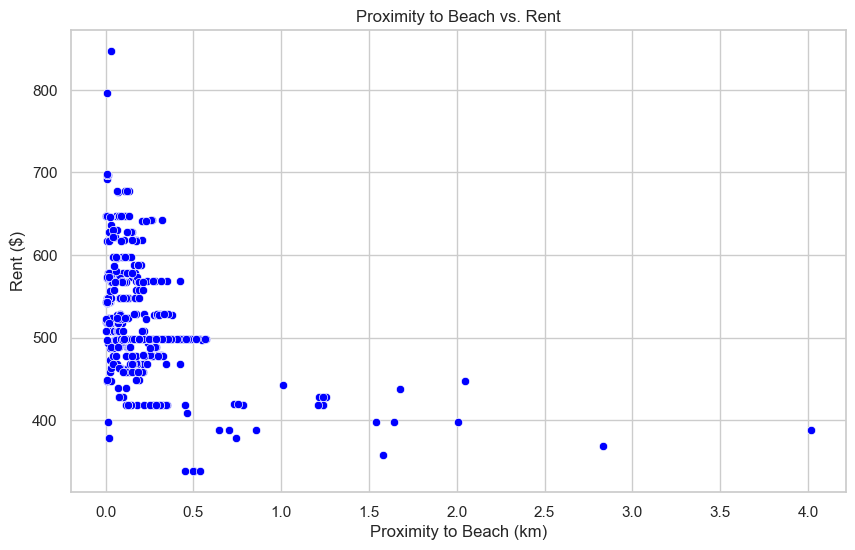

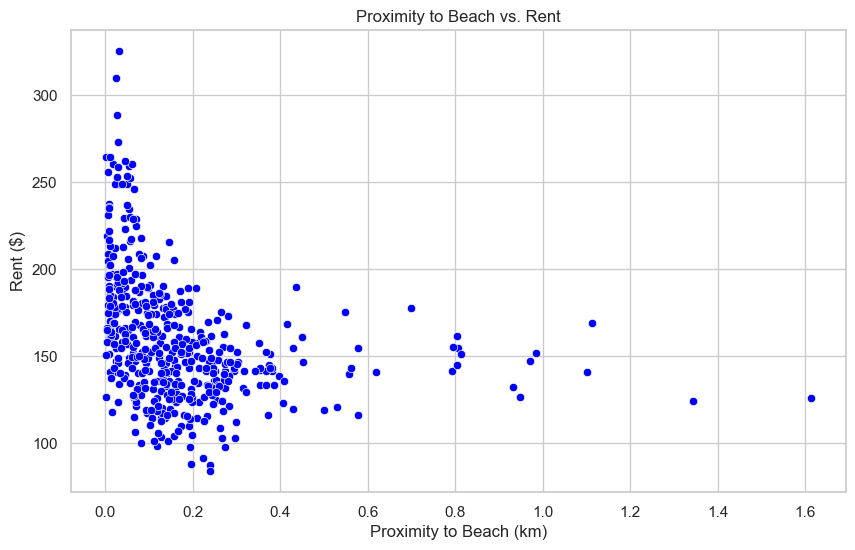

In [111]:
df = full_df[full_df["year"]==2024]

# Proximity to the Beach raw plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='proximity_to_beach', y='average_weekly_rent', color='blue', marker='o')

# Add labels and title
plt.title('Proximity to Beach vs. Rent')
plt.xlabel('Proximity to Beach')
plt.ylabel('Rent ($)')
plt.grid(True)


plt.savefig("../plots/CANVA_2024beachesbefore.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


# Proximity to the Beach logged plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_proximity_to_beach', y='average_weekly_rent/inflation/household_size', color='blue', marker='o')

# Add labels and title
plt.title('Log of Proximity to Beach vs. Rent')
plt.xlabel('Logged Proximity to Beach')
plt.ylabel('Rent ($)')
plt.grid(True)

plt.savefig("../plots/CANVA_2024beachesafter.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## Density of Response variable (Average Weekly Rent) Plots

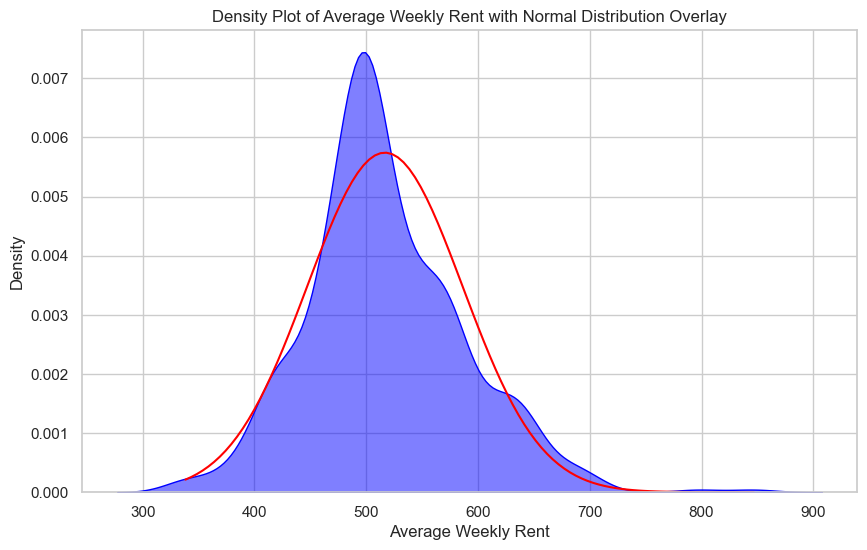

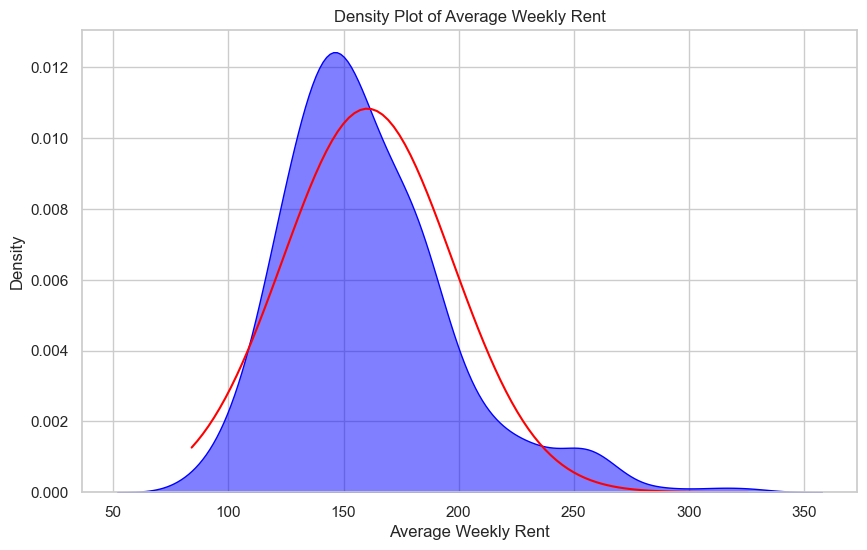

In [113]:
# Filter the data for 2024
df = full_df[full_df["year"] == 2024]

# Average Weekly Rent raw density plot

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df["average_weekly_rent"], fill=True, color='blue', alpha=0.5, label='KDE')

# Overlay normal distribution
mean = df["average_weekly_rent"].mean()
std = df["average_weekly_rent"].std()
x_vals = np.linspace(df["average_weekly_rent"].min(), df["average_weekly_rent"].max(), 100)
plt.plot(x_vals, norm.pdf(x_vals, mean, std), color='red', label='Normal Distribution')

# Add labels and title
plt.title('Density Plot of Average Weekly Rent with Normal Distribution Overlay')
plt.xlabel('Average Weekly Rent')
plt.ylabel('Density')

plt.savefig("../plots/CANVA_density2024before.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()



# Adjusted Average Weekly Rent (transformed) density plot

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df["average_weekly_rent/inflation/household_size"], fill=True, color='blue', alpha=0.5)

# Overlay normal distribution
mean = df["average_weekly_rent/inflation/household_size"].mean()
std = df["average_weekly_rent/inflation/household_size"].std()
x_vals = np.linspace(df["average_weekly_rent/inflation/household_size"].min(), df["average_weekly_rent/inflation/household_size"].max(), 100)

plt.plot(x_vals, norm.pdf(x_vals, mean, std), color='red', label='Normal Distribution')

# Add labels and title
plt.title('Density Plot of Average Weekly Rent')
plt.xlabel('Average Weekly Rent')
plt.ylabel('Density')

plt.savefig("../plots/CANVA_density2024after.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## Distance to CBD Plots

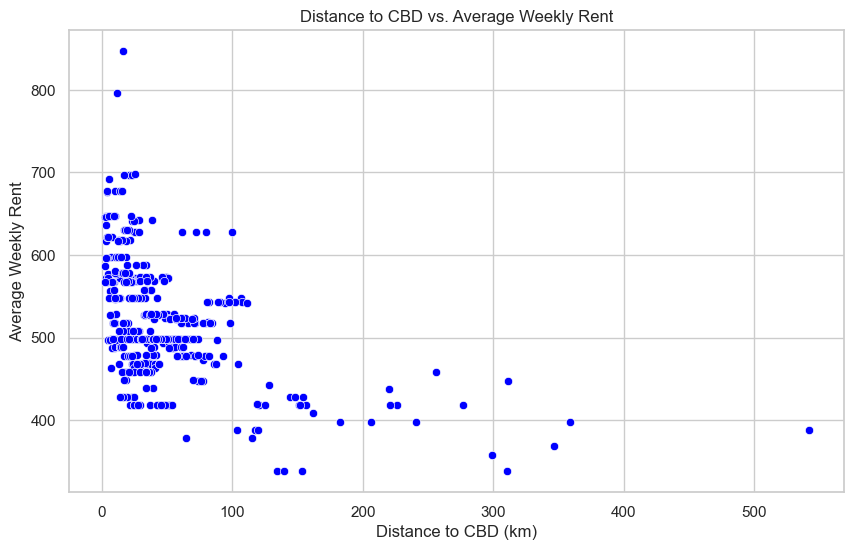

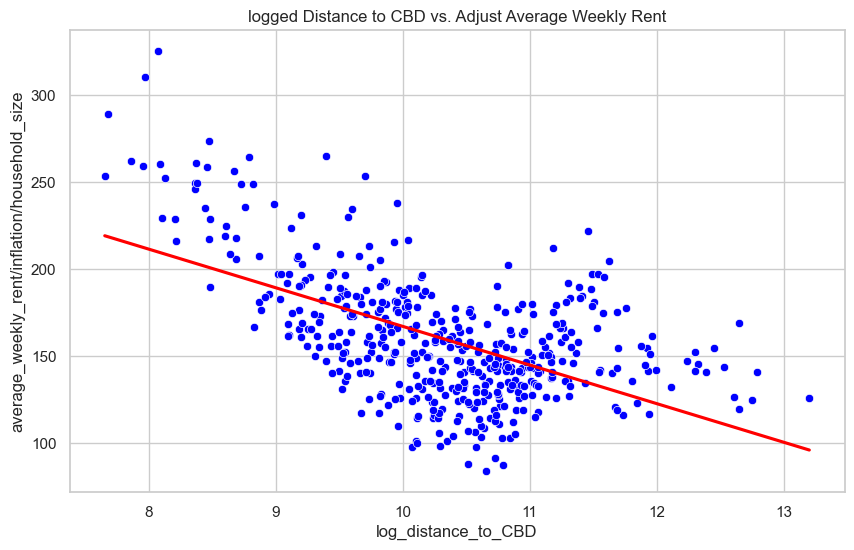

In [114]:
# filter the data
temp_df = full_df[full_df["year"]==2024]
df = temp_df

# Distance to CBD raw data plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_CBD', y='average_weekly_rent', color='blue', marker='o')

# Add labels and title
plt.title('Distance to CBD vs. Average Weekly Rent')
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Average Weekly Rent')
plt.grid(True)


plt.savefig("../plots/CANVA_2024CBDbefore.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


# Distance to CBD logged data plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_distance_to_CBD', y='average_weekly_rent/inflation/household_size', color='blue', marker='o')

# Add labels and title
plt.title('logged Distance to CBD vs. Adjust Average Weekly Rent')
plt.xlabel('log of Distance to CBD')
plt.ylabel('Average Weekly Rent/(Inflation * Household Size)')
plt.grid(True)

# add a regression line
sns.regplot(data=df, x='log_distance_to_CBD', y='average_weekly_rent/inflation/household_size', scatter=False, color='red', ci=None)
plt.savefig("../plots/CANVA_2024CBDafter.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## Median Total Personal Income Weekly (inflation adjusted) Plots

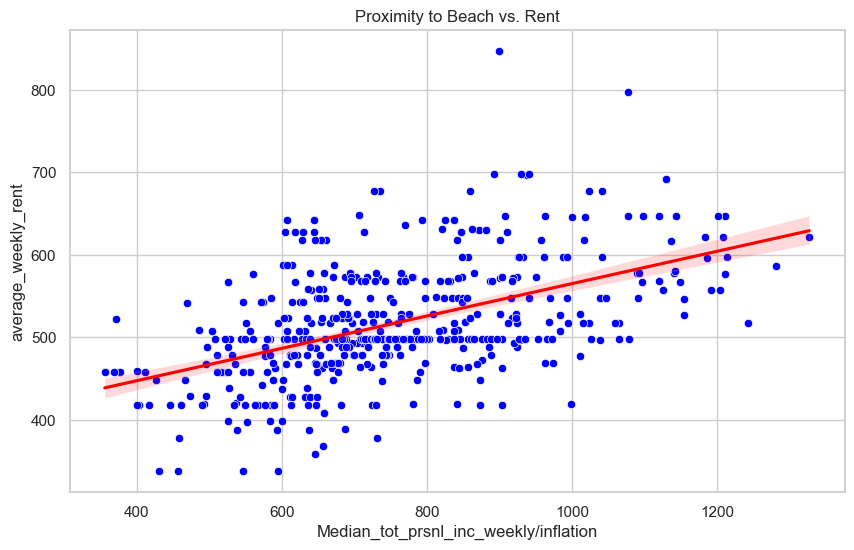

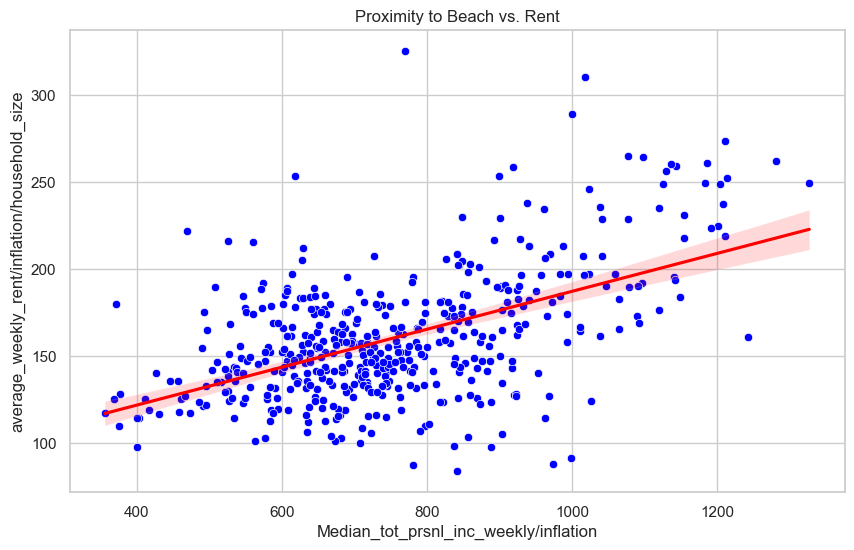

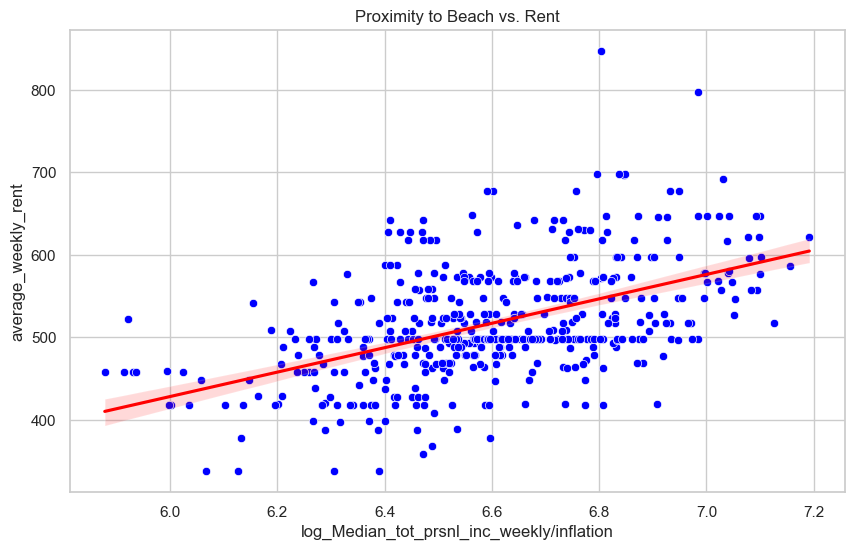

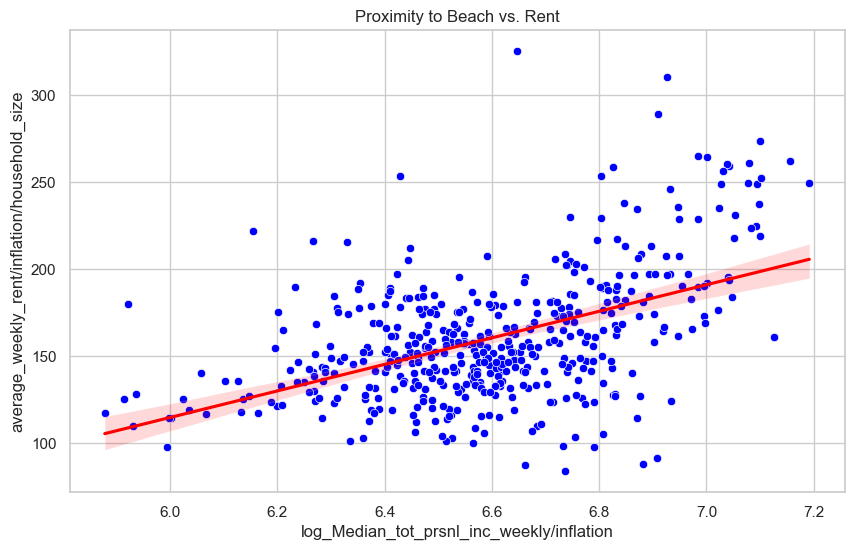

In [115]:
df = full_df[full_df["year"]==2024]


# Median weekly personal income (inflation adjusted) v weekly rent plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Median_tot_prsnl_inc_weekly/inflation', y='average_weekly_rent', color='blue', marker='o')

# Add labels and title
plt.title('Proximity to Beach vs. Rent')
plt.xlabel('Proximity to Beach (km)')
plt.ylabel('Rent ($)')
plt.grid(True)

# add a regression line
sns.regplot(data=df, x='Median_tot_prsnl_inc_weekly/inflation', y='average_weekly_rent', scatter=False, color='red')
# Show the plot
plt.show()


# Median weekly personal income (inflation adjusted) v adjusted weekly rent plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Median_tot_prsnl_inc_weekly/inflation', y='average_weekly_rent/inflation/household_size', color='blue', marker='o')

# Add labels and title
plt.title('Proximity to Beach vs. Rent')
plt.xlabel('Proximity to Beach (km)')
plt.ylabel('Rent ($)')
plt.grid(True)

# add a regression line
sns.regplot(data=df, x='Median_tot_prsnl_inc_weekly/inflation', y='average_weekly_rent/inflation/household_size', scatter=False, color='red')

# Show the plot
plt.show()


# Median weekly personal income (inflation adjusted) v weekly rent plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_Median_tot_prsnl_inc_weekly/inflation', y='average_weekly_rent', color='blue', marker='o')

# Add labels and title
plt.title('Proximity to Beach vs. Rent')
plt.xlabel('Proximity to Beach (km)')
plt.ylabel('Rent ($)')
plt.grid(True)

# add a regression line
sns.regplot(data=df, x='log_Median_tot_prsnl_inc_weekly/inflation', y='average_weekly_rent', scatter=False, color='red')
# Show the plot
plt.show()


# Median weekly personal income (inflation adjusted) logged v adjusted weekly rent plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_Median_tot_prsnl_inc_weekly/inflation', y='average_weekly_rent/inflation/household_size', color='blue', marker='o')

# Add labels and title
plt.title('Proximity to Beach vs. Rent')
plt.xlabel('Proximity to Beach (km)')
plt.ylabel('Rent ($)')
plt.grid(True)

# add a regression line
sns.regplot(data=df, x='log_Median_tot_prsnl_inc_weekly/inflation', y='average_weekly_rent/inflation/household_size', scatter=False, color='red')

# Show the plot
plt.show()

## Commerical Density Plots

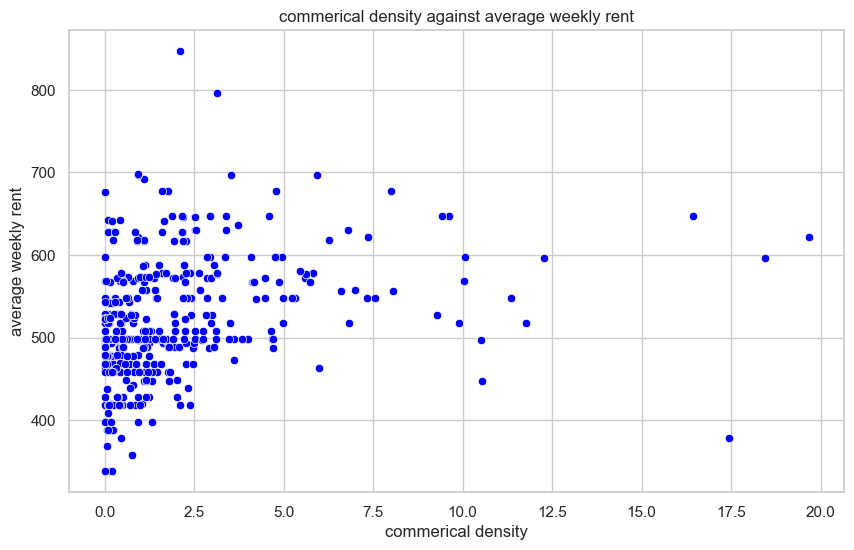

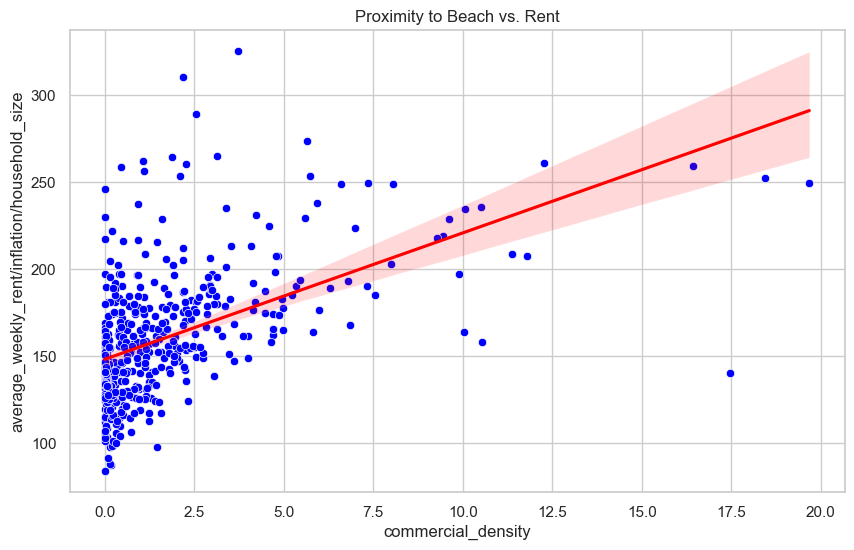

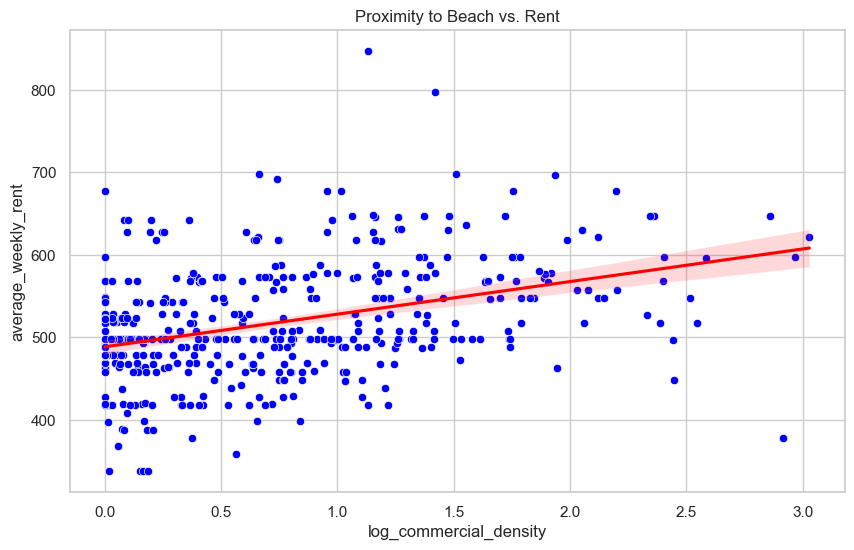

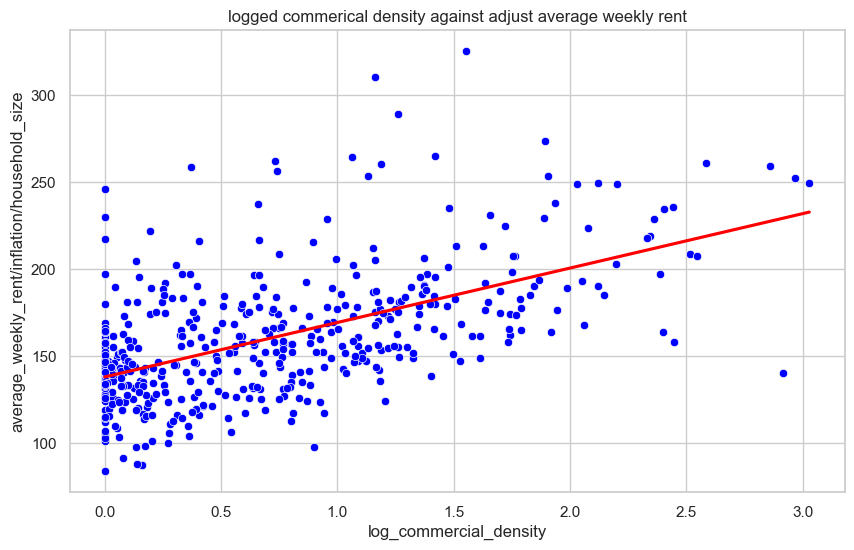

In [116]:
df = full_df[full_df["year"]==2024]

# commerical density v weekly rent plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='commercial_density', y='average_weekly_rent', color='blue', marker='o')

# Add labels and title
plt.title('commerical density against average weekly rent')
plt.xlabel('commerical density')
plt.ylabel('average weekly rent')
plt.grid(True)

# Show the plot
plt.savefig("../plots/CANVA_commericaldensitybefore.png", dpi=300, bbox_inches='tight')
plt.show()


# commerical density v adjusted weekly rent plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='commercial_density', y='average_weekly_rent/inflation/household_size', color='blue', marker='o')

# Add labels and title
plt.title('Proximity to Beach vs. Rent')
plt.xlabel('Proximity to Beach (km)')
plt.ylabel('Rent ($)')
plt.grid(True)

# Optionally, add a regression line
sns.regplot(data=df, x='commercial_density', y='average_weekly_rent/inflation/household_size', scatter=False, color='red')

# Show the plot
plt.show()


# commerical density logged v weekly rent plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_commercial_density', y='average_weekly_rent', color='blue', marker='o')

# Add labels and title
plt.title('Proximity to Beach vs. Rent')
plt.xlabel('Proximity to Beach (km)')
plt.ylabel('Rent ($)')
plt.grid(True)

# Optionally, add a regression line
sns.regplot(data=df, x='log_commercial_density', y='average_weekly_rent', scatter=False, color='red')
# Show the plot
plt.show()


# commerical density logged v adjusted weekly rent plot

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_commercial_density', y='average_weekly_rent/inflation/household_size', color='blue', marker='o')

# Add labels and title
plt.title('logged commerical density against adjust average weekly rent')
plt.xlabel('log of commerical density')
plt.ylabel('average weekly rent/(inflation * household size )')
plt.grid(True)

# add a regression line
sns.regplot(data=df, x='log_commercial_density', y='average_weekly_rent/inflation/household_size', scatter=False, color='red', ci=None)
plt.savefig("../plots/CANVA_commericaldensitytransformed.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()